# Dados de 1.USA.gov do Bitly
---

## Contexto

Em 2011, o serviço de encurtamento de URL Bitly firmou uma parceir acom o site USA.gov do governo dos Estados Unidos para fornecer um feed de dados ânonimos coletados de usários que encurtavam links terminando com _.gov_ ou _.mil_. No mesmo ano, um live feed e snapshots de hora em hora estavam disponíveis como arquivos de texto para download.

**Índice**

1. [Importações e Personalização](#importacoes-e-personalizacao)
2. [Carregando Dados](#carregando-dados)
3. [Contagem de Fusos Horários](#contagem-de-fusos-horarios)  
   1. [Python](#python)
   2. [Pandas](#pandas)
4. [Informações sobre o Navegador](#informacoes-sobre-o-navegador)
    1. [Parsing de Todas Informações](#parsing-de-todas-informacoes)
    2. [Decomposição dos Principais Fusos Horários em Usuário ou Não do Windows](#decomposicao-dos-principais-fusos-horarios-em-usuario-ou-nao-do-windows)
5. [Principais Fusos Horários](#principais-fusos-horarios)

## Importações e Personalização
---

In [223]:
# Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import defaultdict, Counter
from typing import List, Tuple

# Personalização
%matplotlib inline
np.random.seed(123)
plt.rc("figure", figsize=(8, 6))
plt.rcParams['figure.dpi'] = 300
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

## Carregando Dados
---

No caso dos instantâneos de hora em hora, cada linha em cada arquivo contém uma forma comum de dados da web conhecida como JSON.

In [224]:
path = "./data.txt"  # define o caminho do arquivo

with open(path) as f:   # 'with' -> garente que fecha o arquivo após a executação
  print(f.readline())   # 'readlin' -> lê a primeira linha do arquivo

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [225]:
# Conversão JSON para dicionário Python
with open(path) as f:
  records = [json.loads(line) for line in f]  # texto para objeto Python -> JSON

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Contagem de fusos horários
---

Encontrar os fusos horários que correm com mais frequência no conjunto de dados (o campo **tz**).

### Python

In [226]:
# Lista com todos os valores associados a "tz"
# time_zones = [rec["tz"] for rec in records if "tz" in rec] 
time_zones = []
for rec in records:
    if "tz" in rec:
        if len(rec["tz"]) >= 1:
            time_zones.append(rec["tz"])
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York']

In [227]:
# Tamanho da lista
len(time_zones)

2919

Uma abordagem para contar seria usando um dicionário para armazenar as contagens enquanto iteramos pelos fusos horários. Podemos utlizar a biblioteca **Counter** para facilitar.

In [228]:
# Contagem do fuso horário
def get_counts(sequence: List[str]) -> int:
  counts = defaultdict(int)

  for x in sequence:
    counts[x] += 1

  return counts

counts = get_counts(time_zones)
counts["America/New_York"]

# Dez fusos horários principais e suas contagens
'''
def top_counts(count_dict: List[str], n=10) -> List[Tuple[int, str]]:
  value_key_pairs = [(counts, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()

  return value_key_pairs[-n:]

top_counts(counts)
'''

counts = Counter(time_zones)
counts.most_common(10)


[('America/New_York', 1251),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28)]

### Pandas

In [229]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [230]:
frame.isnull().sum()

a               120
c               641
nk              120
tz              120
gr              641
g               120
h               120
l               120
al              466
hh              120
r               120
u               120
t               120
hc              120
cy              641
ll              641
_heartbeat_    3440
kw             3467
dtype: int64

In [231]:
frame["tz"].head(10)

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [232]:
tz_counts = frame["tz"].value_counts()
tz_counts.head(10)

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

Vizualizando os dados de contagens, mas primeiro os valores ausentes foram tratados com o método **fillna** e o uso de indexação de array booleana para as strings vazias.

In [233]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()

tz_counts

tz
America/New_York        1251
Unknown                  521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: count, Length: 98, dtype: int64

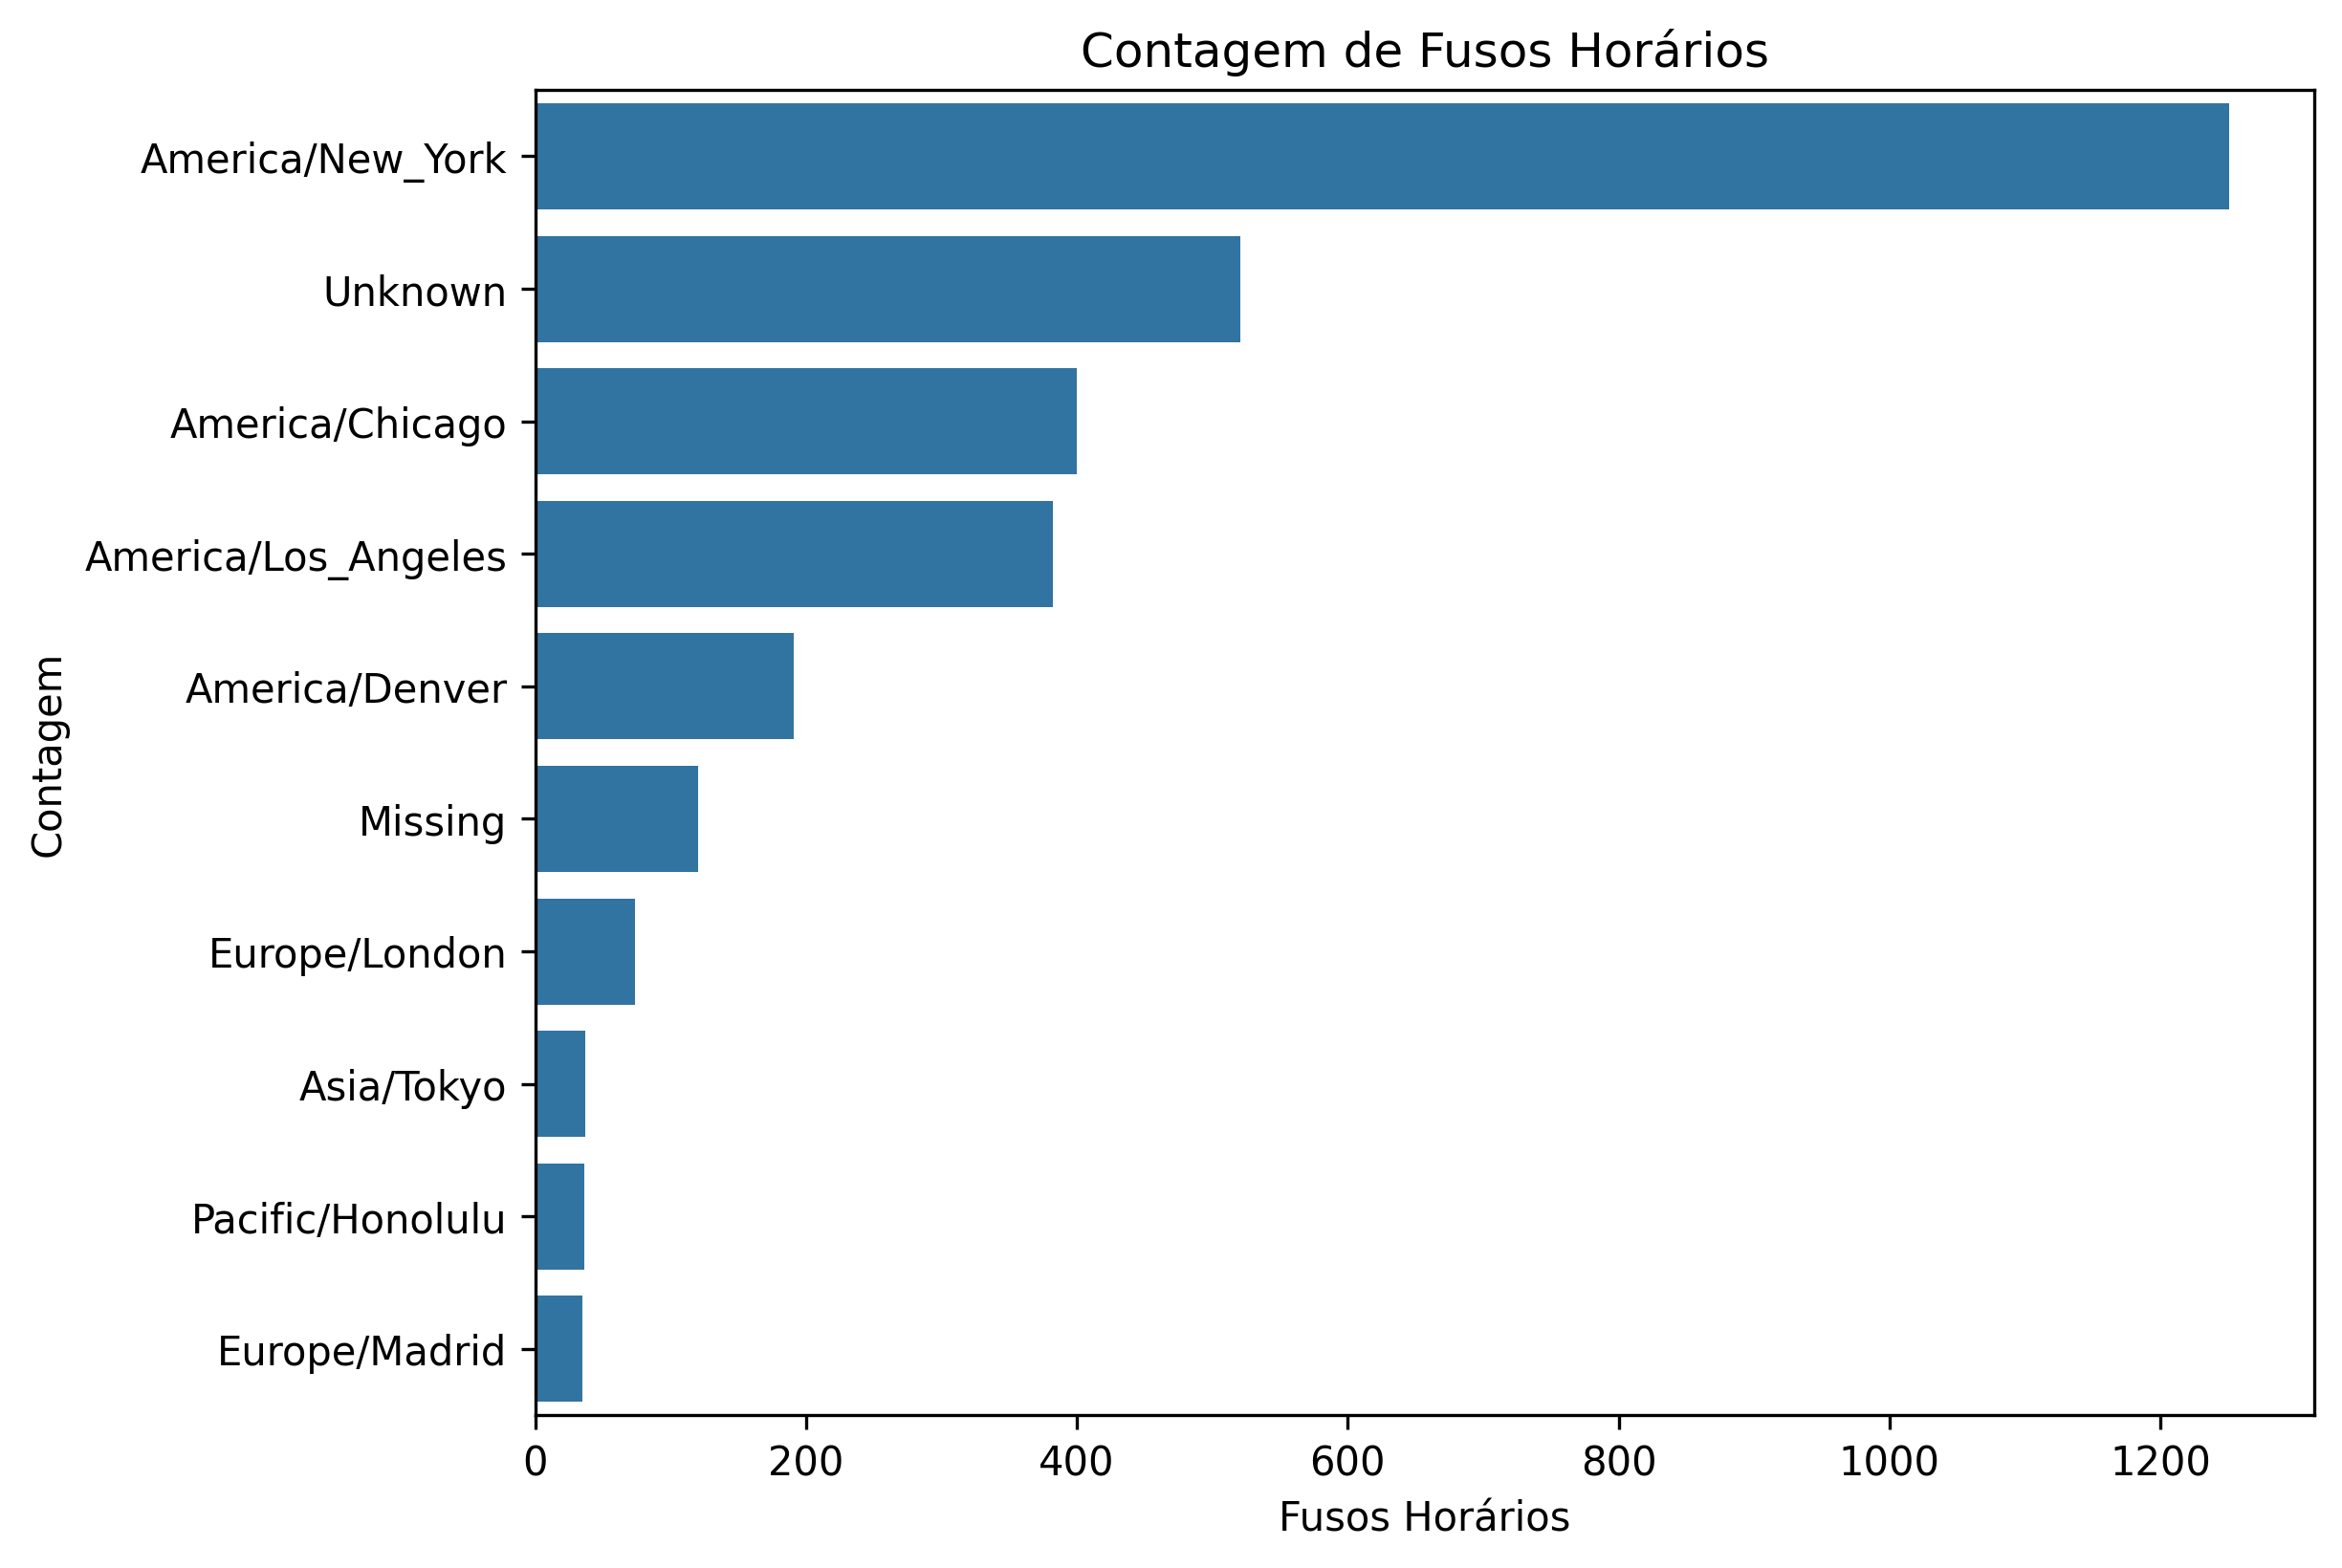

In [234]:
subset = tz_counts.head(10)
g = sns.barplot(x=subset.values, 
                y=subset.index)
g.set_title("Contagem de Fusos Horários")
g.set_xlabel("Fusos Horários")
g.set_ylabel("Contagem")

plt.show()


## Informações sobre o navegador
---

O campo **a** contém todas informações sobre o navegador, o dispositivo ou a aplicação na excecução do encurtamentodo URL.

In [235]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [236]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [237]:
frame["a"][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

### Parsing de todas as informações

Dividir o primeiro token da string (correspondente aos recursos de navegador) e criar outro resumo do comportamento dos usuários. 

Uma estratégia possivel seria dividir o primeiro token (correspondente aos recursos de navegador) e criar outro resumo do comportamento dos usuários

In [238]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.value_counts()

Mozilla/5.0                   2594
Mozilla/4.0                    601
GoogleMaps/RochesterNY         121
Opera/9.80                      34
TEST_INTERNET_AGENT             24
                              ... 
SAMSUNG-SGH-A887/A887UCIJ1       1
BlackBerry9530/5.0.0.328         1
BlackBerry8520/5.0.0.1067        1
NokiaC3-00/5.0                   1
BlackBerry9700/5.0.0.862         1
Name: count, Length: 36, dtype: int64

### Decomposição dos Principais Fusos Horários em Usuário ou Não do Windows

Supondo que o usuário seja considerado como estando no Windows se a string "Windows"
fizer parte da string de agente

In [239]:
# Cria uma cópia sem valores nulos da coluna "a"
cframe = frame[frame["a"].notna()].copy()

# Cria uma coluna nova "os" com valores do usuário
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Não Windows")
cframe["os"].head(5)

0        Windows
1    Não Windows
2        Windows
3    Não Windows
4        Windows
Name: os, dtype: object

Agrupando os dados por sua coluna de fusos horários e essa nova lista de sistema operacional

In [240]:
# Agrupando as colunas "tz" e "os"
by_tz_os = cframe.groupby(["tz", "os"])

# Contagem de ocorrência de cada combinação existem 
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()


os,Não Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


## Principais Fusos Horários

Array de índices indiretos a aprtir das contagens de linhas de **agg_counts**. Depois as contagens de linhas com **agg_counts.sum("columns")** com **argsort()**

In [241]:
indexer = agg_counts.sum(axis="columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

Usar **take** para selecionar as linhas nessa ordem e, em seguida, fatiar as últimas
dez linhas dos valores maiores

In [242]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Não Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Utilizando pandas com método **nlargest**

In [243]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Vizualizando os dados comparando o número de usuários e não usuários do Windows.

In [244]:
# Reorganizar os dados
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()

In [245]:
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Não Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Não Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Não Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Não Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Não Windows,43.0
9,Europe/London,Windows,31.0


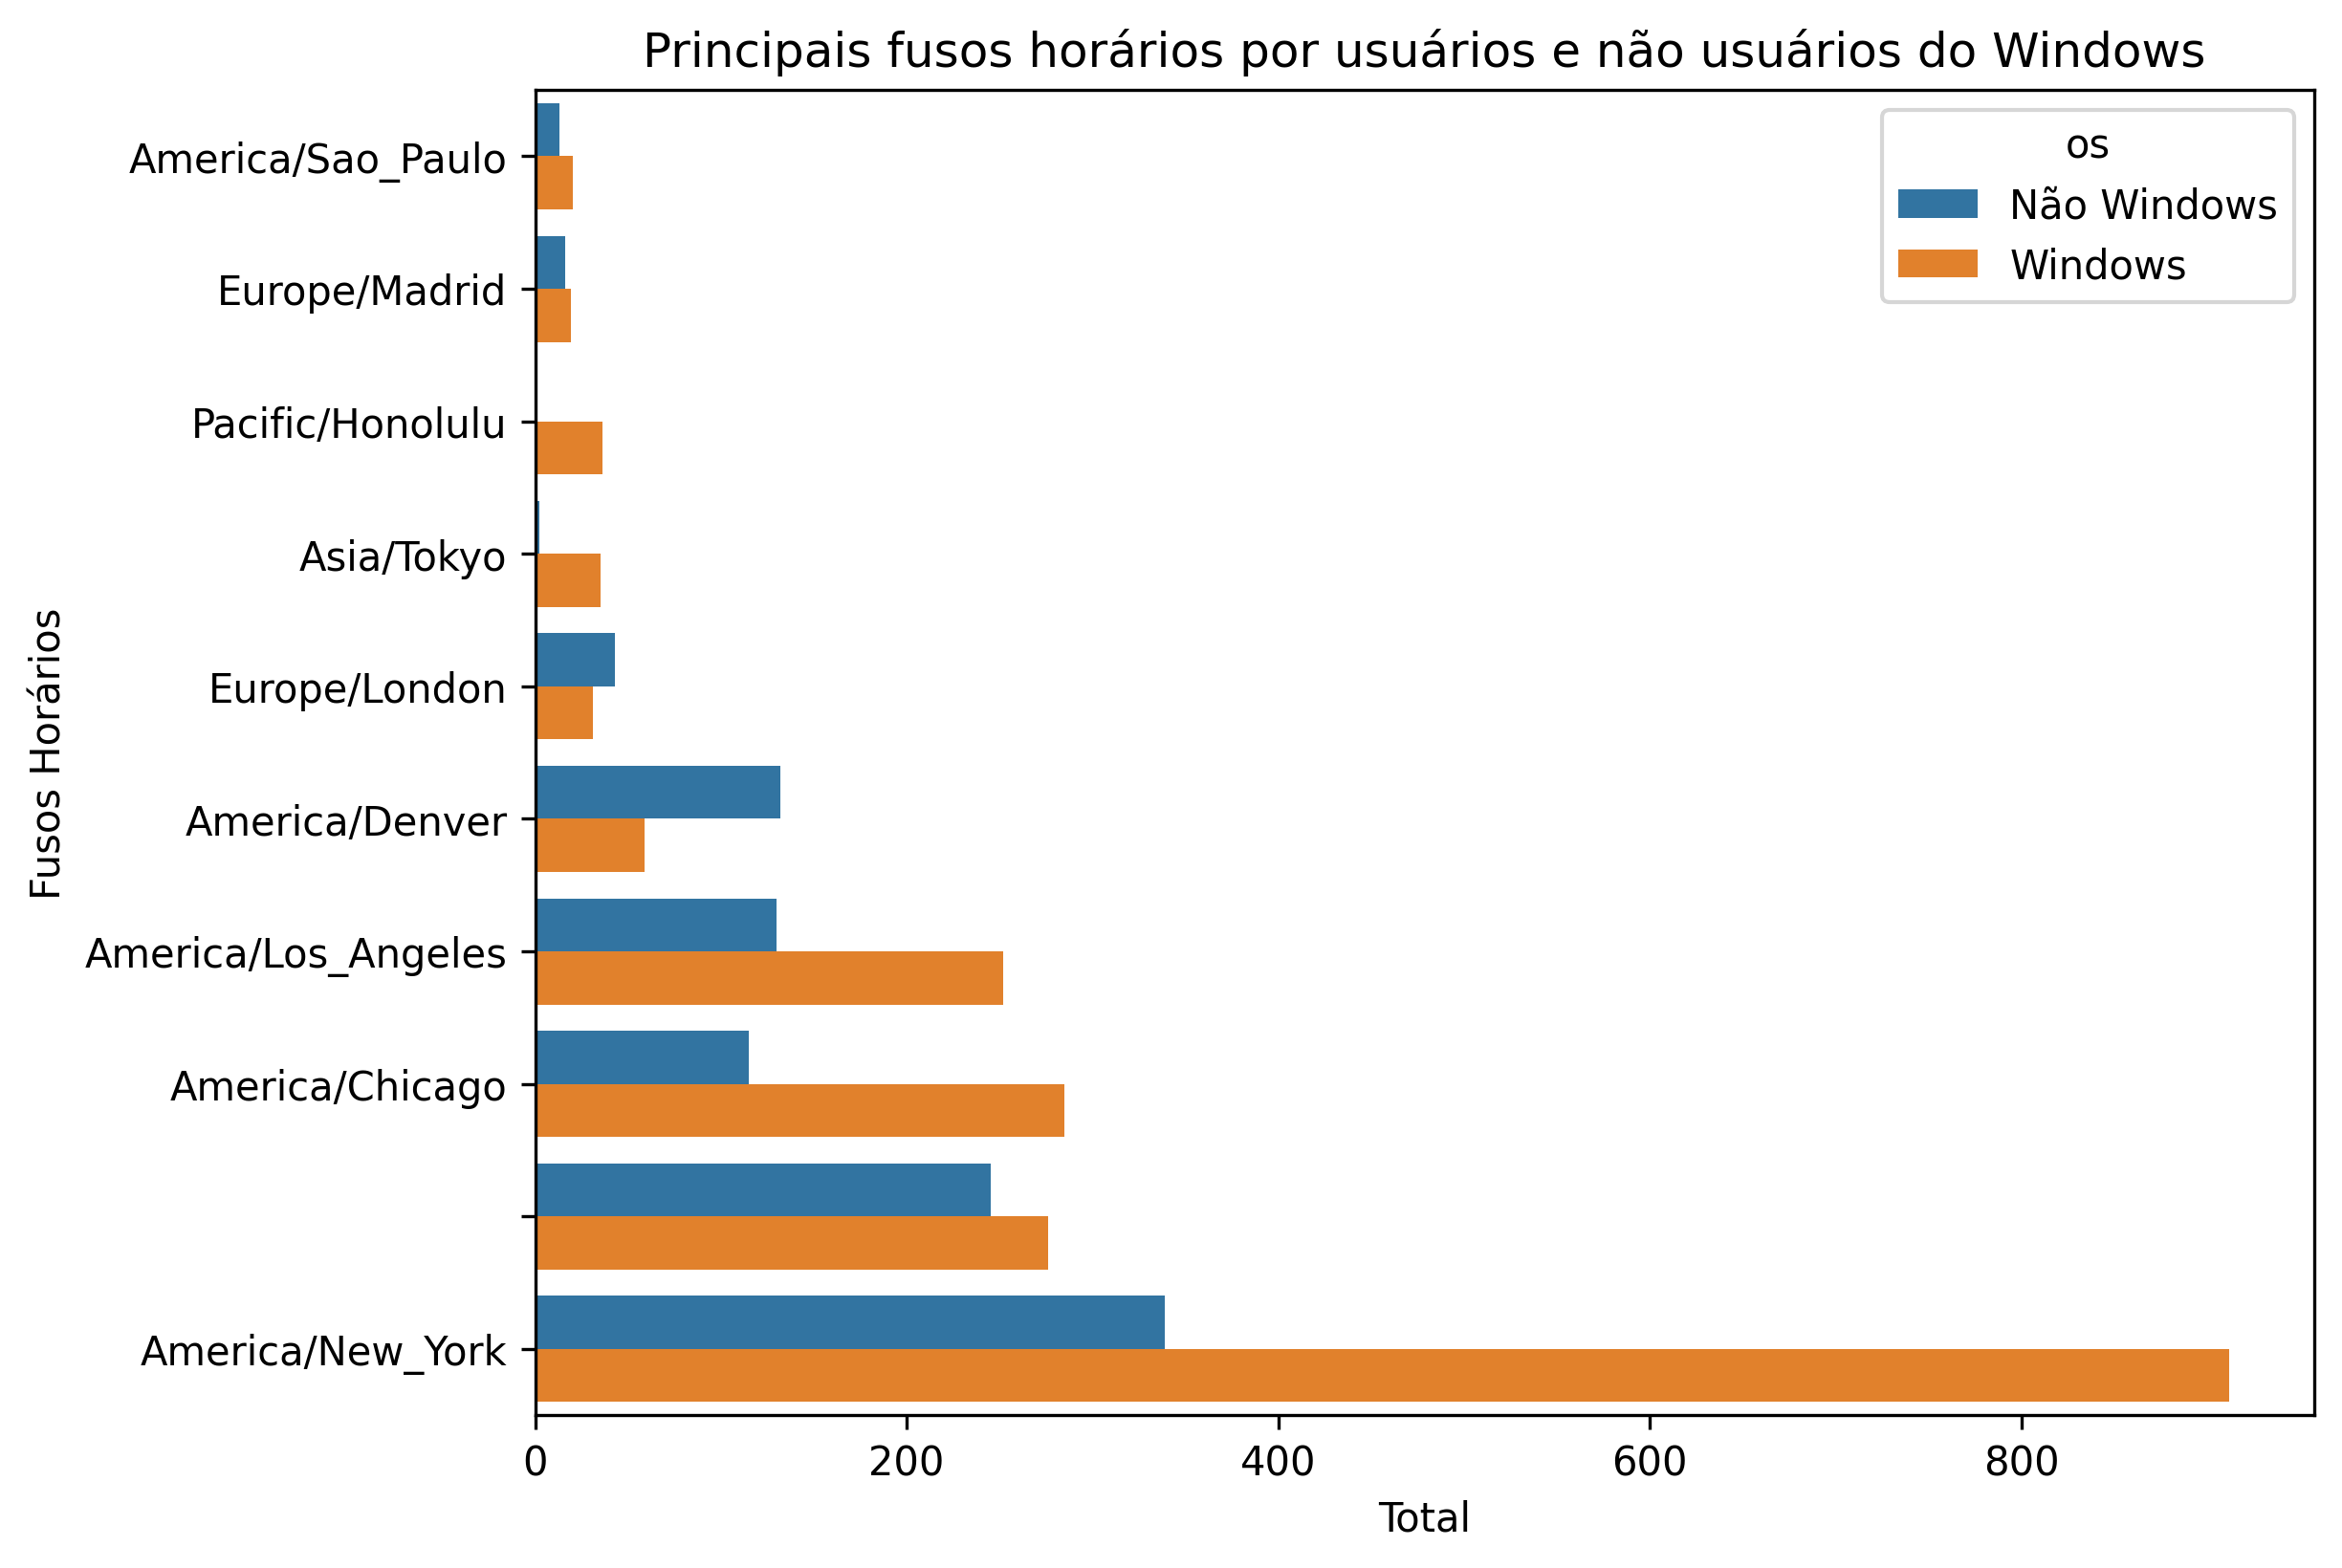

In [246]:
g = sns.barplot(data=count_subset, 
            x="total",
            y="tz",
            hue="os",
            palette="tab10")
g.set_title("Principais fusos horários por usuários e não usuários do Windows")
g.set_xlabel("Total")
g.set_ylabel("Fusos Horários")
plt.show()

In [247]:
# Normalizando os percentuas dos grupos para que a soma seja 1, para melhor vizualização 
x = count_subset.groupby("tz")
count_subset["normed_total"] = count_subset.total / x["total"].transform('sum')

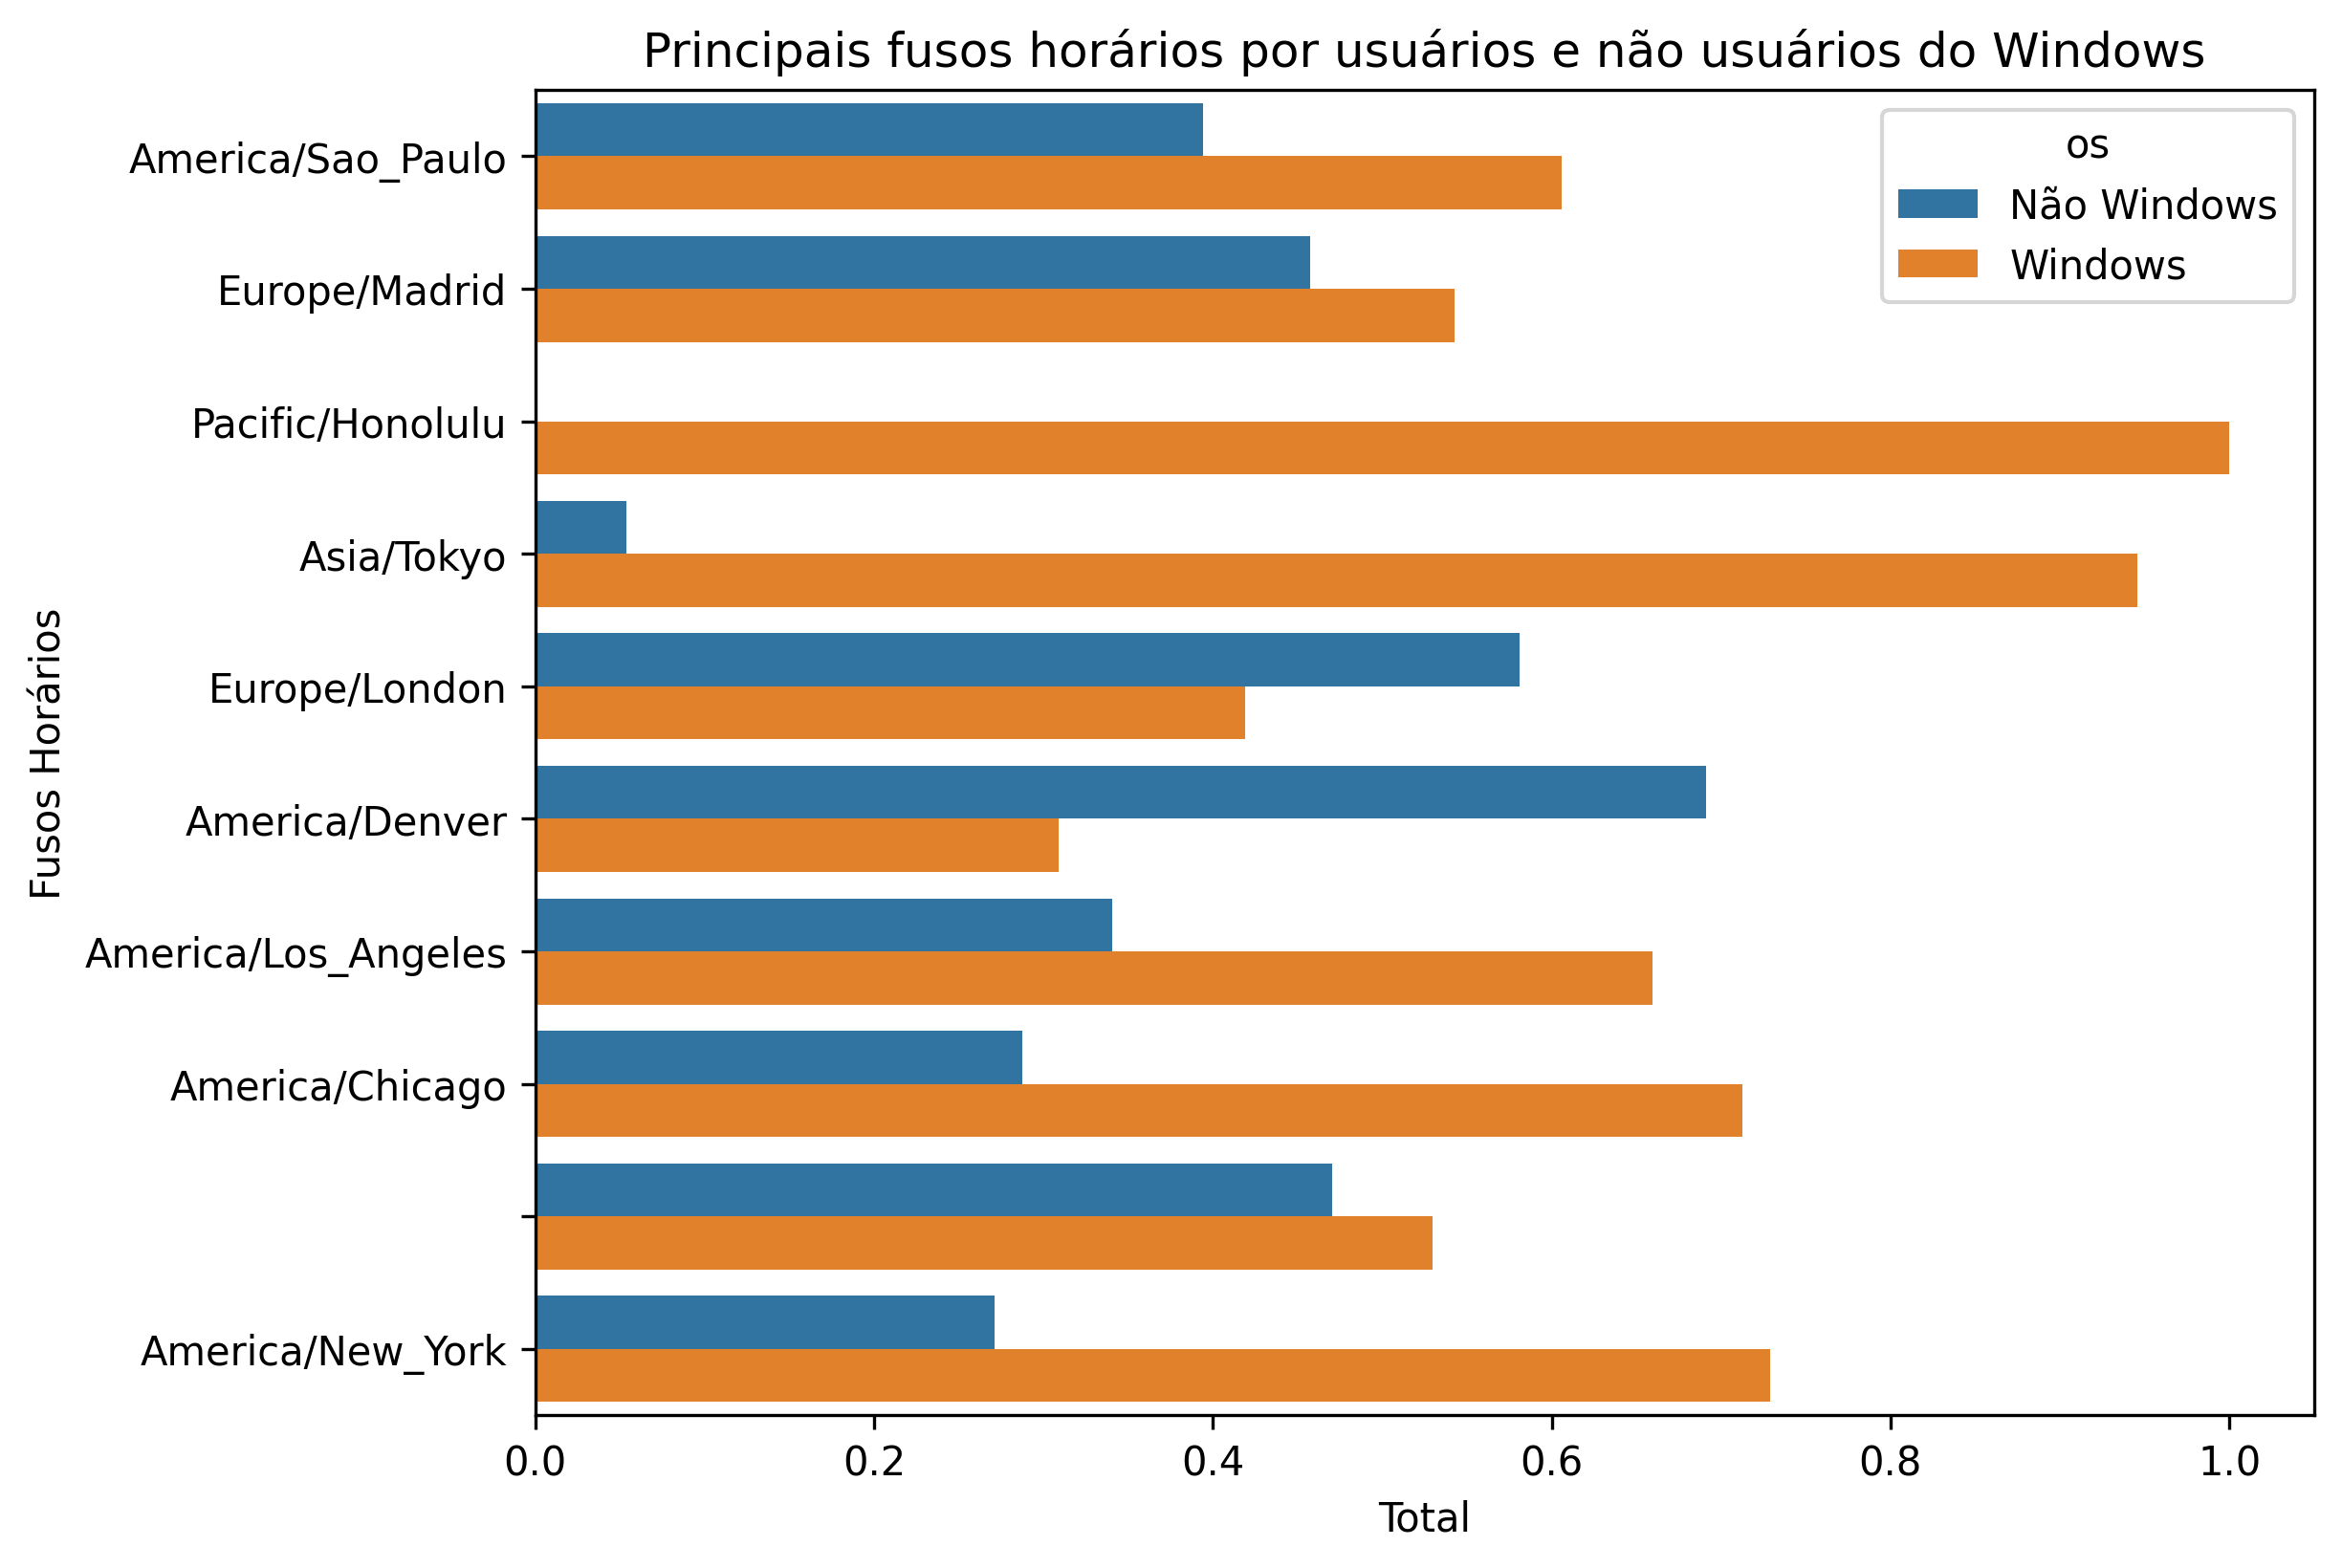

In [248]:
g = sns.barplot(data=count_subset,
                x="normed_total",
                y="tz",
                hue="os",
                palette="tab10")
g.set_title("Principais fusos horários por usuários e não usuários do Windows")
g.set_xlabel("Total")
g.set_ylabel("Fusos Horários")
plt.show()